# Time Series Modeling and Forecasting of COVID-19 Cases in India

### Objective

The objective of this project is to analyze and forecast the trend of **COVID-19 confirmed cases in India** using time series modeling techniques. By applying time series models, we aim to identify the most accurate forecasting method that captures both trend and seasonality in the data. The insights derived will support public health planning and resource allocation by providing a data-driven outlook on future case trajectories.

#### Task 1:
Prepare a complete data analysis report on the given dataset, including trends, patterns, and visualizations of confirmed COVID-19 cases.

#### Task 2:
Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the COVID-19 cases based on past cases for a specific country or region.

#### Task 3:
Provide meaningful suggestions to the health department of India based on the model predictions to help them prepare for potential future scenarios.


# Feature Description: time_series_covid19_confirmed_global.csv

This dataset contains global time series data of confirmed COVID-19 cases, as reported by Johns Hopkins University. Each row represents cumulative case counts for a specific region over time.

## Column-wise Feature Explanation

### 1. **Province/State**
- **Description:** Name of the province, state, or administrative region.
- **Type:** *String* (Nullable)
- **Example:** "Maharashtra", "New South Wales", "" (blank for country-level data)

### 2. **Country/Region**
- **Description:** Name of the country or sovereign region.
- **Type:** *String*
- **Example:** "India", "United States", "Italy"

### 3. **Lat**
- **Description:** Latitude coordinate of the region.
- **Type:** *Float*
- **Example:** 20.5937 (India)

### 4. **Long**
- **Description:** Longitude coordinate of the region.
- **Type:** *Float*
- **Example:** 78.9629 (India)

### 5. **Date Columns (1/22/20, 1/23/20, ..., 9/16/20)**
- **Description:** Daily cumulative number of confirmed COVID-19 cases.
- **Type:** *Integer*
- **Format:** MM/DD/YY
- **Range:** From 01/22/2020 to 09/16/2020
- **Example:**  
  - Column: 4/1/20
  - Value for India: 1,998 (This means that India reported a total of 1,998 confirmed cases up to April 1, 2020)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
data_confirmed   # this variable is used to store the covid-19 comfirmed case data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [3]:
data_death = pd.read_csv('time_series_covid19_deaths_global.csv')
data_death  # Variable to store the COVID-19 death case data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


In [4]:
data_recovery = pd.read_csv('time_series_covid19_recovered_global.csv')
data_recovery  # this variable contains the from the covid-19 recovery case data.

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


- The dataset contains time-stampe recorded in the **MM/DD/YYYY** format.
- The dataset includes time-stamped records of confirmed COVID-19 cases in India, spanning from **January 22, 2020**, to **September 16, 2020**.

# EDA

# 1. DATA CONFIRMED CASES

#### Filtered the dataset to extract confirmed COVID-19 cases specific to India for further analysis

In [5]:
data_confirmed.loc[data_confirmed['Country/Region']=='India']   # Filter the dataset to include only records related to India 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
143,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,4754356,4846427,4930236,5020359,5118253,5214677,5308014,5400619,5487580,5487580


In [6]:
india_con_data = data_confirmed.loc[data_confirmed['Country/Region']=='India'].drop(columns = ['Province/State','Lat','Long'])
india_con_data      # Extract relevant features required for modeling

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
143,India,0,0,0,0,0,0,0,0,1,...,4754356,4846427,4930236,5020359,5118253,5214677,5308014,5400619,5487580,5487580


### Create a DataFrame from the extracted data using the melt function for reshaping

In [7]:
# Melt the DataFrame to convert dates into a single column
data = pd.melt(india_con_data, id_vars=['Country/Region'], var_name='Date', value_name='Value')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')

# Set index to Date for time series structure
data.set_index('Date', inplace=True)

data  

,Country/Region,Value
Date,,
2020-01-22,India,0
2020-01-23,India,0
2020-01-24,India,0
2020-01-25,India,0
2020-01-26,India,0
...,...,...
2020-09-17,India,5214677
2020-09-18,India,5308014
2020-09-19,India,5400619


In [8]:
# Assuming 'data' is the melted DataFrame from the previous step
data = data.drop(columns=['Country/Region'])  # Remove the 'Country/Region' column
data = data.rename(columns={'Value': 'India_confirmed_case'})  # Rename 'Value' to 'India_confirmed_case'
data

,India_confirmed_case
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-09-17,5214677
2020-09-18,5308014
2020-09-19,5400619


In [9]:
# Reset index to make 'Date' a colum
data_reset = data.reset_index()
data_reset

,Date,India_confirmed_case
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
239,2020-09-17,5214677
240,2020-09-18,5308014
241,2020-09-19,5400619
242,2020-09-20,5487580


Now that the time series DataFrame of **confirmed COVID-19 cases** for India has been successfully created, we can proceed with building the time series model and conducting in-depth analysis.

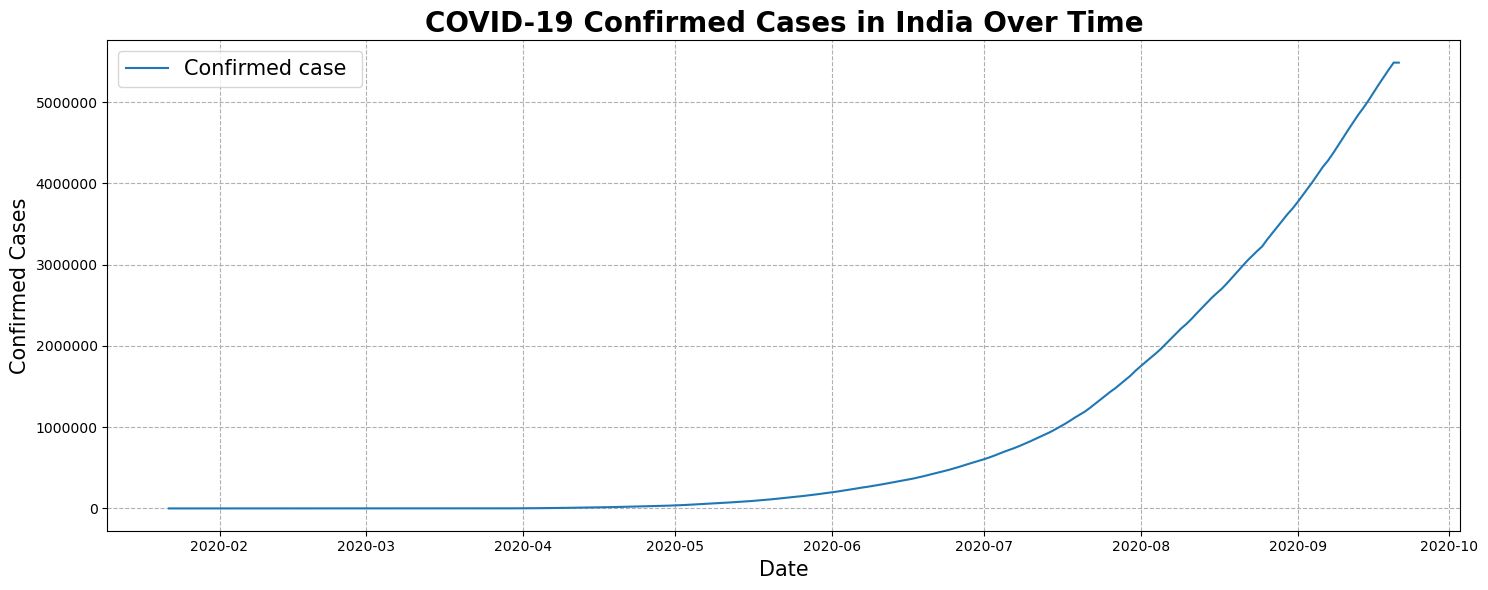

In [10]:
plt.figure(figsize=(15,6))
plt.plot(data_reset['Date'], data_reset['India_confirmed_case'],label='Confirmed case ')
plt.title('COVID-19 Confirmed Cases in India Over Time',fontweight='bold',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Confirmed Cases',size = 15)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation 1e6
plt.grid(True,linestyle='--')
plt.legend(loc = 2,fontsize=15)
plt.tight_layout()
plt.show()

# Insights
- From the above plot, we can clearly see that the number of confirmed COVID-19 cases started to increase in **April**.

- A significant spike in confirmed cases is observed starting from **June**

## DECOMPOSITION
Decompose the time series data of COVID-19 Confirmed in India into **trend**, **seasonality**, and **residual components**.

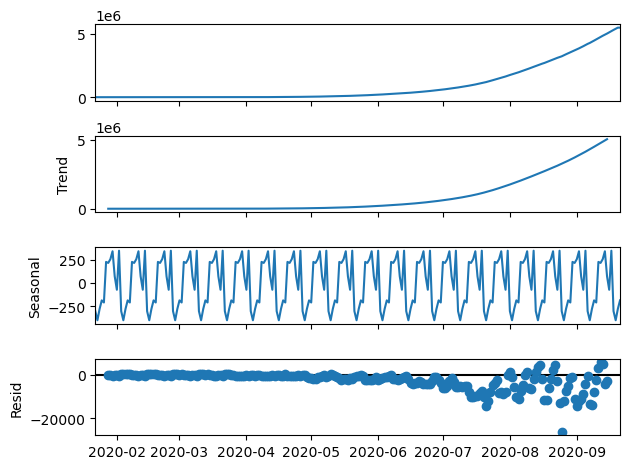

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data,model='additive',period=12)
decomposition.plot()
plt.show()  

# Insights
- The **decomposition plots** clearly indicate the presence of both **trend** and **seasonal components** in the time series datas of Indian Confirmed Cases.

# 2. DATA RECOVERY CASES

#### Filtered the dataset to extract recovery COVID-19 cases specific to India for further analysis

In [12]:
data_recovery.loc[data_confirmed['Country/Region']=='India']   # Filter the dataset to include only records related to India

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
143,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,8788,8788,8788,8788,8788,8788,8788,8788,8788,8788


In [13]:
india_rec_data = data_recovery.loc[data_recovery['Country/Region']=='India'].drop(columns = ['Province/State','Lat','Long'])
india_rec_data       # Extract relevant features required for modeling

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
130,India,0,0,0,0,0,0,0,0,0,...,3702595,3780107,3859399,3942360,4025079,4112551,4208431,4303043,4396399,4396399


### Create a DataFrame from the extracted data using the melt function for reshaping

In [14]:
# Melt the DataFrame to convert dates into a single column
data2 = pd.melt(india_rec_data, id_vars=['Country/Region'], var_name='Date', value_name='Value')

# Convert 'Date' column to datetime
data2['Date'] = pd.to_datetime(data2['Date'], format='%m/%d/%y')

# Set index to Date for time series structure
data2.set_index('Date', inplace=True)

data2

,Country/Region,Value
Date,,
2020-01-22,India,0
2020-01-23,India,0
2020-01-24,India,0
2020-01-25,India,0
2020-01-26,India,0
...,...,...
2020-09-17,India,4112551
2020-09-18,India,4208431
2020-09-19,India,4303043


In [15]:
# Assuming 'data' is the melted DataFrame from the previous step
data2 = data2.drop(columns=['Country/Region'])  # Remove the 'Country/Region' column
data2 = data2.rename(columns={'Value': 'India_Recovery_case'})  # Rename 'Value' to 'India_Recovery_case'
data2

,India_Recovery_case
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-09-17,4112551
2020-09-18,4208431
2020-09-19,4303043


In [16]:
# Reset index to make 'Date' a colum
data2_reset = data2.reset_index()
data2_reset

,Date,India_Recovery_case
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
239,2020-09-17,4112551
240,2020-09-18,4208431
241,2020-09-19,4303043
242,2020-09-20,4396399


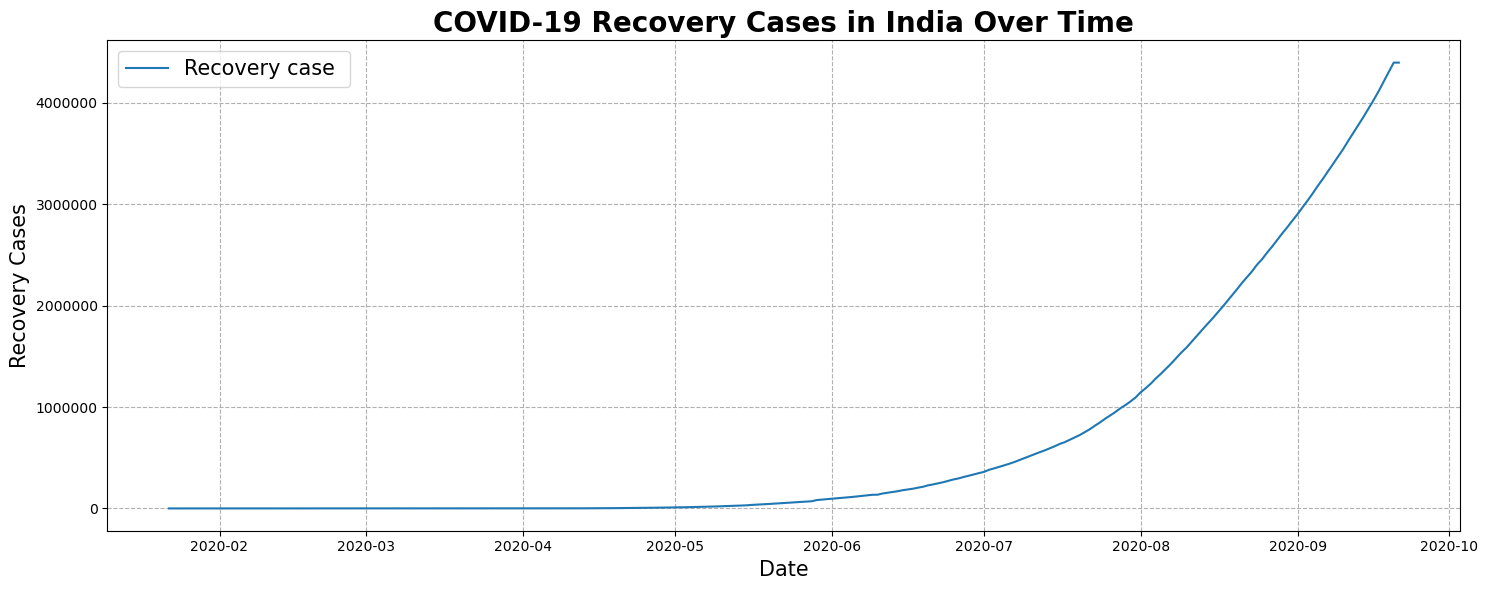

In [17]:
plt.figure(figsize=(15,6))
plt.plot(data2_reset['Date'], data2_reset['India_Recovery_case'],label='Recovery case ')
plt.title('COVID-19 Recovery Cases in India Over Time',fontweight='bold',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Recovery Cases',size = 15)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation 1e6
plt.grid(True,linestyle='--')
plt.legend(loc = 2,fontsize=15)
plt.tight_layout()
plt.show()

# Insights
- From the above plot, we can clearly see that the number of recovery COVID-19 cases started to increase in **May**.

- A significant spike in Recovery cases is observed starting from **June**

## DECOMPOSITION
Decompose the time series data of COVID-19 Recovery in India into **trend**, **seasonality**, and **residual components**.

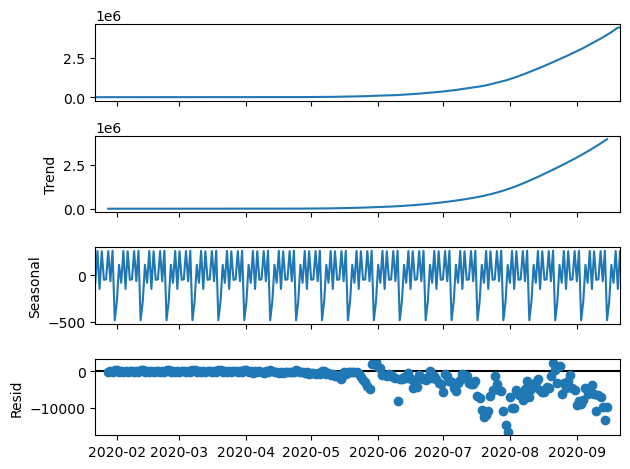

In [18]:
decomposition_rec = seasonal_decompose(data2,model='additive',period=12)
decomposition_rec.plot()
plt.show()

# Insights
- The **decomposition plots** clearly indicate the presence of both **trend** and **seasonal components** in the time series datas of Indian recovery.

# 3. DEATH CASES

### Filtered the dataset to extract  COVID-19 death cases specific to India for further analysis

In [19]:
data_death.loc[data_confirmed['Country/Region']=='India'] # Filter the dataset to include only records related to India

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
143,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,78586,79722,80776,82066,83198,84372,85619,86752,87882,87882


In [20]:
india_dea_data = data_death.loc[data_death['Country/Region']=='India'].drop(columns = ['Province/State','Lat','Long'])
india_dea_data  # Extract relevant features required for modeling

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
143,India,0,0,0,0,0,0,0,0,0,...,78586,79722,80776,82066,83198,84372,85619,86752,87882,87882


### Create a DataFrame from the extracted data using the melt function for reshaping

In [21]:
# Melt the DataFrame to convert dates into a single column
data3 = pd.melt(india_dea_data, id_vars=['Country/Region'], var_name='Date', value_name='Value')

# Convert 'Date' column to datetime
data3['Date'] = pd.to_datetime(data3['Date'], format='%m/%d/%y')

# Set index to Date for time series structure
data3.set_index('Date', inplace=True)

data3

,Country/Region,Value
Date,,
2020-01-22,India,0
2020-01-23,India,0
2020-01-24,India,0
2020-01-25,India,0
2020-01-26,India,0
...,...,...
2020-09-17,India,84372
2020-09-18,India,85619
2020-09-19,India,86752


In [22]:
# Assuming 'data' is the melted DataFrame from the previous step
data3 = data3.drop(columns=['Country/Region'])  # Remove the 'Country/Region' column
data3 = data3.rename(columns={'Value': 'India_death_case'})  # Rename 'Value' to 'India_death_case'
data3

,India_death_case
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-09-17,84372
2020-09-18,85619
2020-09-19,86752


In [23]:
# Reset index to make 'Date' a colum
data3_reset = data3.reset_index()
data3_reset

,Date,India_death_case
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
239,2020-09-17,84372
240,2020-09-18,85619
241,2020-09-19,86752
242,2020-09-20,87882


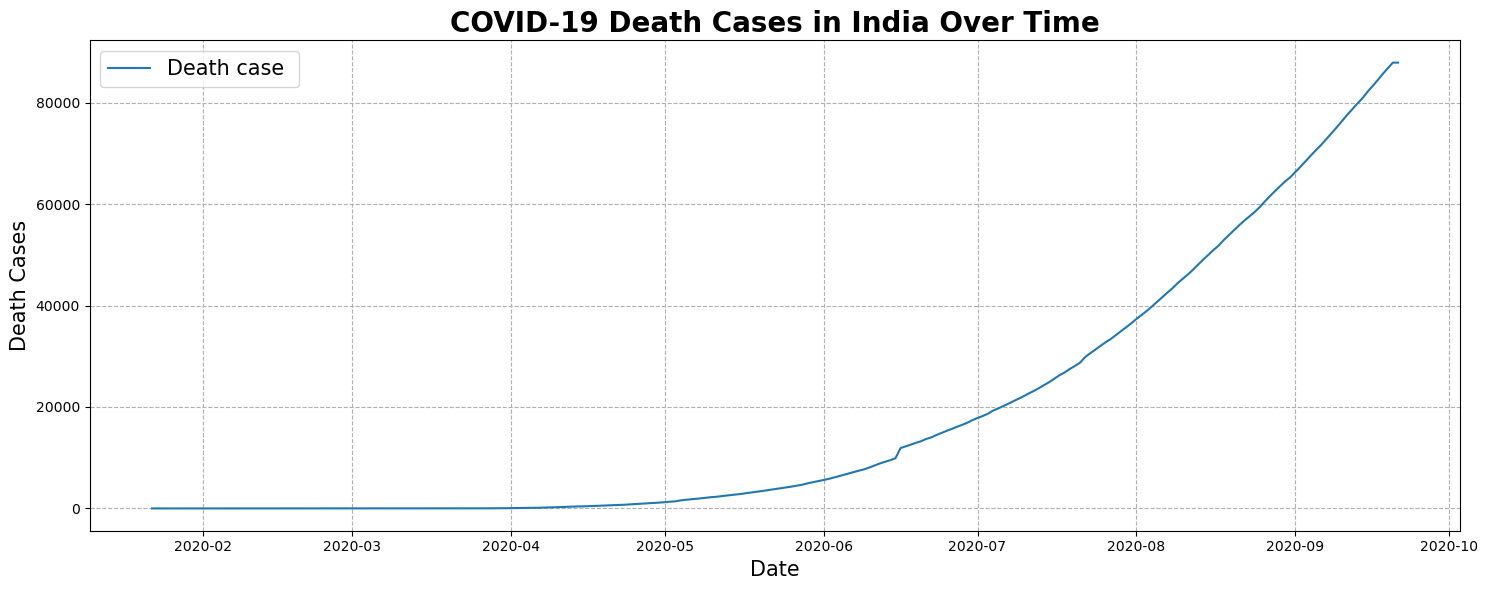

In [24]:
plt.figure(figsize=(15,6))
plt.plot(data3_reset['Date'], data3_reset['India_death_case'],label='Death case ')
plt.title('COVID-19 Death Cases in India Over Time',fontweight='bold',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Death Cases',size = 15)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation 1e6
plt.grid(True,linestyle='--')
plt.legend(loc = 2,fontsize=15)
plt.tight_layout()
plt.show()

# Insights
- From the above plot, we can clearly see that the number of COVID-19 death cases started to increase in **Mid of April**.

- A significant spike in death cases is observed starting from **May**

## DECOMPOSITION
Decompose the time series data of COVID-19 deaths in India into **trend**, **seasonality**, and **residual components**.

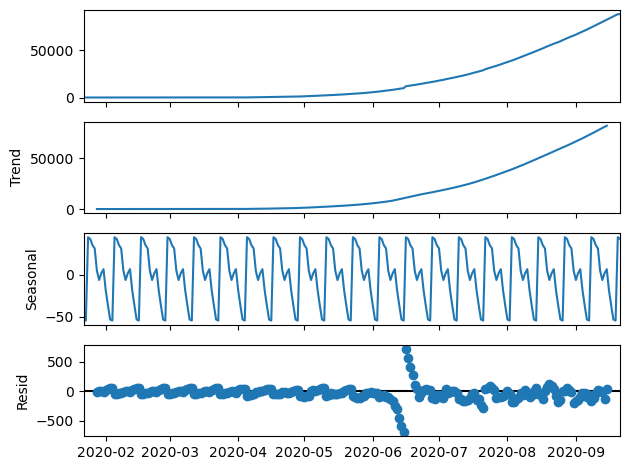

In [25]:
decomposition_dea = seasonal_decompose(data3,model='additive',period=12)
decomposition_dea.plot()
plt.show()

# Insights
- The **decomposition plots** clearly indicate the presence of the strong upward **trend** starting **mid-2020**, clear weekly **seasonality**, and noticeable **residual** anomalies around June 2020

# TASK 2: Time Series Forecasting of COVID-19 Confirmed Cases in India
# Objective
To build an accurate time series forecasting model that predicts future **confirmed COVID-19 cases** in India based on historical data.

# BASIC CHECKS

In [26]:
data.info() # here, we can See some information about the dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2020-01-22 to 2020-09-21
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   India_confirmed_case  244 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [27]:
data.head()  # here, we can see the first 5 datas in the dataframe

,India_confirmed_case
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [28]:
data.tail()   # here, we can see last 5 datas in the dataframe

,India_confirmed_case
Date,
2020-09-17,5214677
2020-09-18,5308014
2020-09-19,5400619
2020-09-20,5487580
2020-09-21,5487580


In [29]:
data.describe().T  # here, we can see the some summarize statistical values from the dataframe

,count,mean,std,min,25%,50%,75%,max
India_confirmed_case,244.0,933896.77459,1.466931e+06,0.0,473.25,128108.5,1251125.5,5487580.0


In [30]:
data.value_counts()  # Here, we explore the unique values in the dataset along with their corresponding frequencies

India_confirmed_case
3                       28
0                        8
1                        3
5                        2
5487580                  2
                        ..
78055                    1
81997                    1
85784                    1
90648                    1
286605                   1
Name: count, Length: 206, dtype: int64

In [31]:
data.shape # Based on the analysis, the DataFrame contains a total of 244 days of recorded COVID-19 confirmed cases

(244, 1)

In [32]:
data.index.duplicated().sum() # The analysis indicates that the DataFrame contains no repeated dates or duplicated entries

0

# Check whether the given time series data is stationary 
Decomposition – Making the Time Series Distribution Stationary

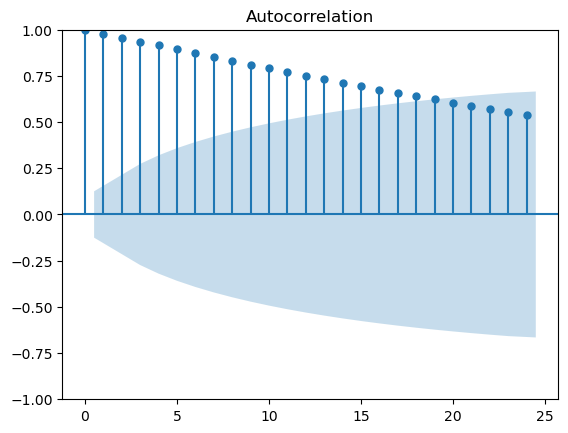

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pylab as py

plot_acf(data)
py.show()

# Insights
- The autocorrelation plot reveals a time series with strong positive correlation at short lags, gradually decreasing over longer lags, with significant autocorrelation persisting up to around 15 lags. 
- The autocorrelation plot clearly indicates the presence of trends in the data, characterized by high and slowly decaying positive autocorrelation over multiple lags.

###  Statistically check for stationarity using the **Augmented Dickey-Fuller (ADF)** test

In [34]:
from statsmodels.tsa.stattools import adfuller

adtest = adfuller(data.India_confirmed_case)

print('1. ADF value :', adtest[0])
print('2. P-value :', adtest[1])
print('3. Num of Lags :', adtest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", adtest[3])
print("5. Critical Values :")

for key, val in adtest[4].items():
    print(key, ':' , val)

1. ADF value : -2.306830176022356
2. P-value : 0.16977456577419886
3. Num of Lags : 15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 228
5. Critical Values :
1% : -3.4593607492757554
5% : -2.8743015807562924
10% : -2.5735714042782396


# Insights
- Based on the Augmented Dickey-Fuller test results, both the **p-value** and **ADF statistic** are not less than the corresponding **critical values** and the chosen **significance level (typically α = 0.05)**.
- Therefore, we fail to reject the null hypothesis, indicating that the time series is **non-stationary**.

In [35]:
# make it stationary by using the differencing method

data1 = data.diff(periods=1)   # here, by taking the difference of 1
data1

,India_confirmed_case
Date,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-09-17,96424.0
2020-09-18,93337.0
2020-09-19,92605.0


In [36]:
data # before, appling the differencing

,India_confirmed_case
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-09-17,5214677
2020-09-18,5308014
2020-09-19,5400619


In [37]:
data1 = data1.iloc[1:]  # here, we removing the NAN values
data1   

,India_confirmed_case
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
...,...
2020-09-17,96424.0
2020-09-18,93337.0
2020-09-19,92605.0


In [38]:
# Again apply the differencing data into adfuller test 

adtest = adfuller(data1.India_confirmed_case)

print('1. ADF value :', adtest[0])
print('2. P-value :', adtest[1])
print('3. Num of Lags :', adtest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", adtest[3])
print("5. Critical Values :")

for key, val in adtest[4].items():
    print(key, ':' , val)

1. ADF value : -4.207966368987826
2. P-value : 0.0006387370620804111
3. Num of Lags : 15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 227
5. Critical Values :
1% : -3.4594900381360034
5% : -2.8743581895178485
10% : -2.573601605503697


# Insights
- The **p-value (0.000638737062084111)** is significantly lower than the conventional **alpha level of 0.05**, indicating strong evidence against the null hypothesis.
- The **ADF test statistic (-4.20796368987826)** is more negative than the critical values at all significance levels: **-3.4594900381360034 (1%)**, **-2.874351895178485 (5%)**, and **-2.57360160503697 (10%)**.
- Based on the results of the **Augmented Dickey-Fuller (ADF) test**, we can conclude that the data is **stationary**.

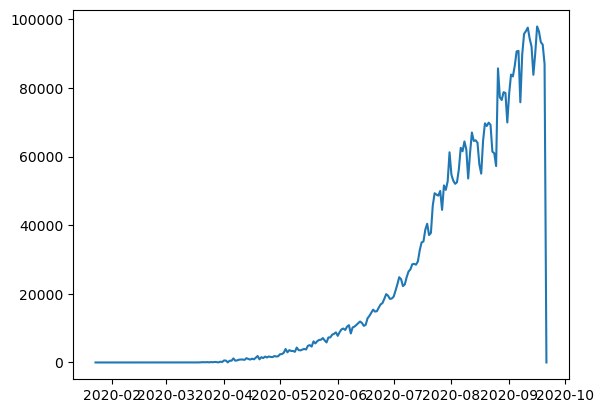

In [39]:
plt.plot(data1) # Visualize the time series after applying differencing to achieve stationarity
plt.show()

In [40]:
data1.shape   #  shape of the data rows and columns

(243, 1)

# SPLITING THE DATA 

In [41]:
train_size = int(len(data1) * 0.8)  # 80% of data is used for the training
train, test = data1[:train_size], data1[train_size:]  # 20% of the data is used for the testing

In [42]:
print(train.shape)  # shows the no.of rows and columns of the train data
print(test.shape)   # shows the no.of rows and columns of the test datab

(194, 1)
(49, 1)


In [43]:
train.head()    # Display the first five rows of the training dataset

,India_confirmed_case
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


# FINDING THE OPTIMAL VALUE FOR THE P,Q
# (i) ACF PLOT
 Plot the ACF to identify optimal **q** values; lags above the significance threshold indicate potential q values

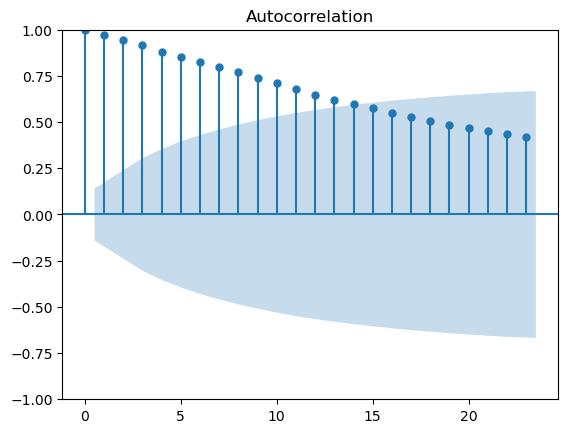

In [44]:
plot_acf(train)
py.show()

# Insights 
- The q value in ARIMA corresponds to the lag after which the autocorrelations drop within the confidence interval **(i.e., the shaded region)**.

- In our plot, significant spikes are seen up to **lag 2 or 3**, and then values gradually decline into the confidence band.

# (ii) PACF PLOT
Plot the PACF to identify optimal **p values**, lags with significant spikes above the confidence interval indicate potential AR terms.

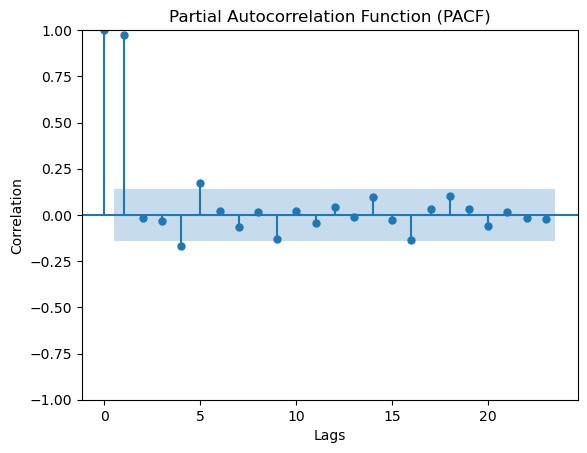

In [45]:
plot_pacf(train)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Insights
- The p value in ARIMA corresponds to the number of significant spikes outside the confidence interval in the PACF.

- In our plot, **lags 1 and 2** are clearly above the threshold, and then it drops within the shaded region.

# MODEL BULDING

 # (i) ARIMA MODEL

In [68]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,1,2))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [69]:
fit_model_ARIMA = model.fit()

# making prediction
prediction_ar = fit_model_ARIMA.predict(start = 195,end = 243)
prediction_ar    # Store the predicted values in this variable

2020-08-05    52188.283833
2020-08-06    52697.597851
2020-08-07    52295.836855
2020-08-08    52611.787790
2020-08-09    52363.560896
2020-08-10    52558.519927
2020-08-11    52405.412964
2020-08-12    52525.648497
2020-08-13    52431.227984
2020-08-14    52505.375820
2020-08-15    52447.148049
2020-08-16    52492.873891
2020-08-17    52456.965727
2020-08-18    52485.164141
2020-08-19    52463.020136
2020-08-20    52480.409658
2020-08-21    52466.753796
2020-08-22    52477.477643
2020-08-23    52469.056286
2020-08-24    52475.669515
2020-08-25    52470.476195
2020-08-26    52474.554470
2020-08-27    52471.351831
2020-08-28    52473.866840
2020-08-29    52471.891822
2020-08-30    52473.442789
2020-08-31    52472.224826
2020-09-01    52473.181283
2020-09-02    52472.430185
2020-09-03    52473.020017
2020-09-04    52472.556826
2020-09-05    52472.920566
2020-09-06    52472.634924
2020-09-07    52472.859237
2020-09-08    52472.683086
2020-09-09    52472.821416
2020-09-10    52472.712786
2

###  Evaluate model performance using appropriate error metrics

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse_ar_model = mean_squared_error(test,prediction_ar)
mae_ar_model = mean_absolute_error(test,prediction_ar)
rmse_ar_model = np.sqrt(mse_ar_model)
print('Mean square error for ARIMA model :',mse_ar_model)
print('Mean absolute error for ARIMA model :',mae_ar_model)
print('Root mean square error for ARIMA model :',rmse_ar_model)

Mean square error for ARIMA model : 776068110.0289861
Mean absolute error for ARIMA model : 23791.305078307243
Root mean square error for ARIMA model : 27857.999031319283


### Plot actual vs predicted values to visualize ARIMA_model performance

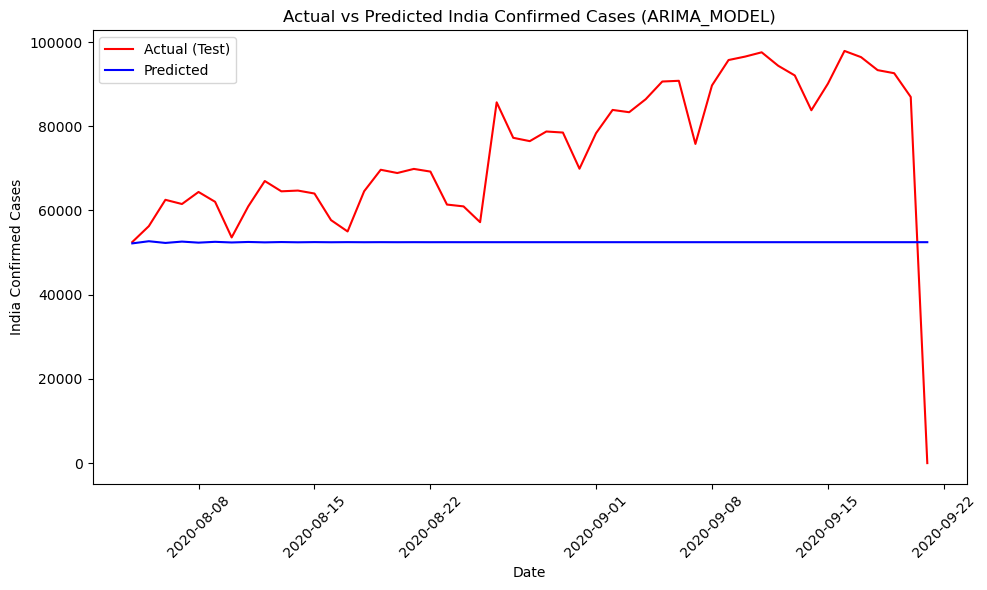

In [61]:
# Ensure test and prediction are aligned
# Extract the values from test (DataFrame) and ensure prediction is a compatible Series/array
test_values = test['India_confirmed_case']  # Series with DateTime index
prediction_values = prediction_ar  # Ensure this matches test's length and index

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index, test_values, color='red', label='Actual (Test)')
plt.plot(test.index, prediction_values, color='blue', label='Predicted')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('India Confirmed Cases')
plt.title('Actual vs Predicted India Confirmed Cases (ARIMA_MODEL)')
plt.legend()
plt.tight_layout()
plt.show()

# ARIMA Model Insights
- **Poor Fit:** The model predictions are almost flat and don’t follow actual trends.

- **Misses Patterns:** It fails to capture the rise and fall in confirmed cases.

- **Too Simple:** ARIMA might be too basic—try **SARIMA**  for better results.

- **Check Errors:** **MSE** - 776068110.0289861 , **RMSE** -  27857.999031319283

# (ii) SARIMA MODEL
To identify the optimal **seasonal** and **non-seasonal** parameters for the **SARIMA model**, a **for-loop** is used to iterate over possible combinations and evaluate their performance.

# 1. First parameter combination: range from 0 to 2

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mse_score = {}

for p in range(2):
    for d in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        try:
                            model = SARIMAX(train, 
                                            order=(p, d, q), 
                                            seasonal_order=(P, D, Q, 12))
                            fit_model = model.fit(disp=False)
                            predictions = fit_model.predict(start=195, end=243)
                            mse = mean_squared_error(test, predictions)
                            key = f'({p},{d},{q}) x ({P},{D},{Q},12)'
                            mse_score[key] = mse
                        except:
                            continue

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [81]:
mse_score # Mean Squared Error for the first parameter combination

{'(0,0,0) x (0,0,0,12)': 5801130442.551021,
 '(0,0,0) x (0,0,1,12)': 5216420790.100379,
 '(0,0,0) x (0,1,0,12)': 824586006.3061224,
 '(0,0,0) x (0,1,1,12)': 601681895.1383165,
 '(0,0,0) x (1,0,0,12)': 824590459.9331838,
 '(0,0,0) x (1,0,1,12)': 790071279.6638196,
 '(0,0,0) x (1,1,0,12)': 1087786761.8018181,
 '(0,0,0) x (1,1,1,12)': 1127064660.5247996,
 '(0,0,1) x (0,0,0,12)': 5801130442.551021,
 '(0,0,1) x (0,0,1,12)': 5190618368.699875,
 '(0,0,1) x (0,1,0,12)': 810699887.1679834,
 '(0,0,1) x (0,1,1,12)': 616401044.3456516,
 '(0,0,1) x (1,0,0,12)': 954465362.3289521,
 '(0,0,1) x (1,0,1,12)': 826196572.476069,
 '(0,0,1) x (1,1,0,12)': 941682720.1215572,
 '(0,0,1) x (1,1,1,12)': 788160091.412493,
 '(0,1,0) x (0,0,0,12)': 794536544.5918367,
 '(0,1,0) x (0,0,1,12)': 769739550.8857752,
 '(0,1,0) x (0,1,0,12)': 266723623.04081634,
 '(0,1,0) x (0,1,1,12)': 231119308.94424185,
 '(0,1,0) x (1,0,0,12)': 729040415.469043,
 '(0,1,0) x (1,0,1,12)': 832408062.9061401,
 '(0,1,0) x (1,1,0,12)': 239617

In [82]:
min(mse_score, key=lambda k: mse_score[k]) # Extract the parameter combination with the lowest error

'(1,0,1) x (1,1,1,12)'

In [87]:
print('The best combination range 0-2 is = (1,0,1) x (1,1,1,12)','\nMean square error for this combination is -',mse_score['(1,0,1) x (1,1,1,12)'],'\nRoot mean square error for this combination is -',np.sqrt(mse_score['(1,0,1) x (1,1,1,12)'])) # their RMSE values

The best combination range 0-2 is = (1,0,1) x (1,1,1,12) 
Mean square error for this combination is - 224342229.42214215 
Root mean square error for this combination is - 14978.058266081827


# 2. Second parameter combination: range from 2 to 4

In [89]:
mse_score2 = {}

for p in range(2,4):
    for d in range(2,4):
        for q in range(2,4):
            for P in range(2,4):
                for D in range(2,4):
                    for Q in range(2,4):
                        try:
                            model = SARIMAX(train, 
                                            order=(p, d, q), 
                                            seasonal_order=(P, D, Q, 12))
                            fit_model = model.fit(disp=False)
                            predictions = fit_model.predict(start=195, end=243)
                            mse = mean_squared_error(test, predictions)
                            key = f'({p},{d},{q}) x ({P},{D},{Q},12)'
                            mse_score2[key] = mse
                        except:
                            continue

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D w

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D w

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

In [95]:
mse_score2  # Mean Squared Error for the Second parameter combination

{'(2,2,2) x (2,2,2,12)': 1944232943.4838297,
 '(2,2,2) x (2,2,3,12)': 457451225.9234992,
 '(2,2,2) x (2,3,2,12)': 381910013.88251907,
 '(2,2,2) x (2,3,3,12)': 511429788.192748,
 '(2,2,2) x (3,2,2,12)': 220051500.41506895,
 '(2,2,2) x (3,2,3,12)': 508801463.3516962,
 '(2,2,2) x (3,3,2,12)': 1283641511.9791443,
 '(2,2,2) x (3,3,3,12)': 760596232.3102714,
 '(2,2,3) x (2,2,2,12)': 407530312.3980056,
 '(2,2,3) x (2,2,3,12)': 245338300.34483308,
 '(2,2,3) x (2,3,2,12)': 1960283999.4073408,
 '(2,2,3) x (2,3,3,12)': 310532831.36519754,
 '(2,2,3) x (3,2,2,12)': 351718213.1677915,
 '(2,2,3) x (3,2,3,12)': 452645937.9378339,
 '(2,2,3) x (3,3,2,12)': 5801130442.551021,
 '(2,2,3) x (3,3,3,12)': 422532678.796572,
 '(2,3,2) x (2,2,2,12)': 263608501445.06964,
 '(2,3,2) x (2,2,3,12)': 17661284160.686802,
 '(2,3,2) x (2,3,2,12)': 5801130442.551021,
 '(2,3,2) x (2,3,3,12)': 543160416256.02844,
 '(2,3,2) x (3,2,2,12)': 396101346832.33594,
 '(2,3,2) x (3,2,3,12)': 423479284882.79376,
 '(2,3,2) x (3,3,2,12)

In [96]:
min(mse_score2, key=lambda k: mse_score2[k]) # Extract the Second parameter combination with the lowest error

'(2,2,2) x (3,2,2,12)'

In [98]:
print('The best combination range 0-2 is = (2,2,2) x (3,2,2,12)','\nMean square error for this combination is -',mse_score2['(2,2,2) x (3,2,2,12)'],'\nRoot mean square error for this combination is -',np.sqrt(mse_score2['(2,2,2) x (3,2,2,12)'])) # their RMSE values 

The best combination range 0-2 is = (2,2,2) x (3,2,2,12) 
Mean square error for this combination is - 220051500.41506895 
Root mean square error for this combination is - 14834.132951240155


### The parameter combination (2, 2, 2) × (3, 2, 2, 12) resulted in the lowest Mean Squared Error, and will be used to build the SARIMA model.

# SARIMA MODEL 

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

models = SARIMAX(train,order=(2,2,2),seasonal_order=(3,2,2,12))
fit_model_SARIMA = models.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
prediction_SARIMA = fit_model_SARIMA.predict(start = 195,end = 243)
prediction_SARIMA   # Store the predicted values in this variable

2020-08-05    53273.013522
2020-08-06    52837.292032
2020-08-07    55059.790698
2020-08-08    53213.131552
2020-08-09    59287.996495
2020-08-10    57396.541115
2020-08-11    57670.329783
2020-08-12    63519.759999
2020-08-13    59149.260518
2020-08-14    58836.347320
2020-08-15    60921.377095
2020-08-16    63910.114440
2020-08-17    62503.211097
2020-08-18    61158.488115
2020-08-19    63085.009483
2020-08-20    61542.803871
2020-08-21    68476.406288
2020-08-22    66381.126281
2020-08-23    69444.902569
2020-08-24    76605.316095
2020-08-25    68105.382437
2020-08-26    66818.850964
2020-08-27    73215.994274
2020-08-28    77717.633553
2020-08-29    75548.501192
2020-08-30    73607.109058
2020-08-31    75565.706845
2020-09-01    68392.624481
2020-09-02    78595.629400
2020-09-03    75136.216782
2020-09-04    78262.109935
2020-09-05    89990.643328
2020-09-06    77779.751134
2020-09-07    74448.427352
2020-09-08    76515.704582
2020-09-09    80545.728342
2020-09-10    77499.422965
2

###  Evaluate model performance using appropriate error metrics

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(test, prediction_SARIMA)
mae = mean_absolute_error(test, prediction_SARIMA)
print('Mean square error for SARIMA model -',mse)  # Mean square error
print("Mean absolute error for SARIMA model -",mae) # Mean absolute error
print('Root mean square error for SARIMA model -',np.sqrt(mse))  # Root mean square error

Mean square error for SARIMA model - 220051500.41506895
Mean absolute error for SARIMA model - 9247.108948323033
Root mean square error for SARIMA model - 14834.132951240155


### Plot actual vs predicted values to visualize SARIMA_model performance

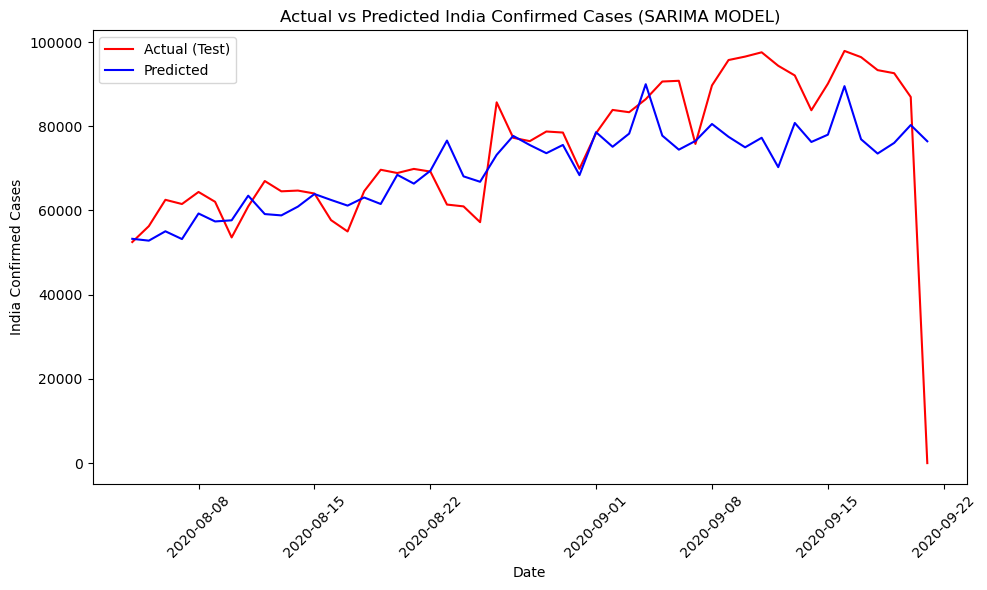

In [102]:
# Ensure test and prediction are aligned
# Extract the values from test (DataFrame) and ensure prediction is a compatible Series/array
test_values = test['India_confirmed_case']  # Series with DateTime index
prediction_values = prediction_SARIMA  # Ensure this matches test's length and index

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index, test_values, color='red', label='Actual (Test)')
plt.plot(test.index, prediction_values, color='blue', label='Predicted')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('India Confirmed Cases')
plt.title('Actual vs Predicted India Confirmed Cases (SARIMA MODEL)')
plt.legend()
plt.tight_layout()
plt.show()

# Check and compare AIC values for ARIMA and SARIMA models

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(test, prediction_SARIMA)
mae = mean_absolute_error(test, prediction_SARIMA)
print('Mean square error for SARIMA model :',mse)  # Mean square error
print("Mean absolute error for SARIMA model :",mae) # Mean absolute error
print('Root mean square error for SARIMA model :',np.sqrt(mse))  # Root mean square error

Mean square error for SARIMA model : 220051500.41506895
Mean absolute error for SARIMA model : 9247.108948323033
Root mean square error for SARIMA model : 14834.132951240155


In [104]:
print('AIC value for the ARIMA model - ',fit_model_ARIMA.aic) 
print('AIC value for the SARIMA model - ',fit_model_SARIMA.aic)
print('BIC value for the ARIMA model - ',fit_model_ARIMA.bic) 
print('BIC value for the SARIMA model - ',fit_model_SARIMA.bic) 

AIC value for the ARIMA model -  3348.6965005191905
AIC value for the SARIMA model -  3039.409594106987
BIC value for the ARIMA model -  3365.009951463715
BIC value for the SARIMA model -  3070.649233901019


### Insights

Based on the AIC and BIC values, the **SARIMA model** provides a significantly better fit than the **ARIMA model** for forecasting **COVID-19 confirmed cases in India**.

- The SARIMA model effectively captures both the **trend** and **seasonality** present in the time series data.
- Lower **AIC** and **BIC** values suggest that SARIMA achieves a better trade-off between model accuracy and complexity.
- Therefore, **SARIMA** is the more suitable and robust model for modeling and forecasting **COVID-19 confirmed cases in India**.


# Task 3:  Make suggestions to the government health department of the country/region for preparation based on your predictions.

### Recommendations to Health Authorities – India

The predicted results indicate a potential **upward trend** in future COVID-19 confirmed cases in **India**, underscoring the need for **proactive planning and timely intervention**. While the SARIMA model captures the overall trend and seasonality effectively, **continuous monitoring and regular model updates** are essential given the evolving nature of the pandemic.



### Recommendations:

**1. Prepare Healthcare Infrastructure**  
Forecasts suggest a possible rise in cases. Ensure that hospitals across India have sufficient **beds, oxygen cylinders, ventilators**, and **medical staff** to handle potential surges in patient load.

**2. Enhance Testing and Contact Tracing**  
Scale up **testing capacity** in high-risk states and districts. Implement robust **contact tracing** to detect and contain emerging clusters swiftly.

**3. Strengthen Vaccination Campaigns and Public Awareness**  
Continue aggressive **vaccination drives**, particularly in vulnerable populations and regions with low vaccine coverage. Launch awareness campaigns to reinforce **COVID-appropriate behavior**, such as mask usage and hand hygiene.

**4. Prepare for Localized Restrictions**  
If regional spikes are anticipated, prepare to enforce **micro-containment zones** or **localized restrictions** rather than nationwide lockdowns, ensuring minimal disruption while containing spread.



These recommendations, guided by data-driven forecasts, aim to support India’s public health response and reduce the impact of potential future waves.

### Conclusion :

In this project, we analyzed **COVID-19 confirmed cases in India** using time series modeling techniques. After performing the necessary preprocessing and ensuring stationarity of the data, we implemented both **ARIMA** and **SARIMA** models to forecast future case counts.

To evaluate model performance, we compared the **Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)** values:

- **AIC value (ARIMA)**: 3348.70  
- **AIC value (SARIMA)**: 3039.41  
- **BIC value (ARIMA)**: 3365.01  
- **BIC value (SARIMA)**: 3070.65  

The **SARIMA model** with parameters **(2, 2, 2) × (3, 2, 2, 12)** provided superior performance, as evidenced by the lowest AIC and BIC values. This indicates a better fit and a more optimal balance between model complexity and forecasting accuracy.

**Conclusion**: The SARIMA model is the more effective and reliable choice for modeling and forecasting **COVID-19 confirmed cases in India**.


### Challenges Faced :

1. **Data Extraction for India**  
   Extracting India's specific data from the global COVID-19 dataset posed an initial challenge, as it required precise filtering and aggregation to isolate the relevant time series.

2. **Handling Trend and Seasonality**  
   The extracted time series exhibited both a clear trend and seasonality, which made preprocessing and modeling more complex. Ensuring the data was suitable for SARIMA modeling required additional steps such as differencing and seasonal adjustment.

3. **Model Selection Time and Computational Load**  
   Finding the optimal parameters for the SARIMA model through a grid search using nested for-loops was highly time-consuming, taking up to 24 hours to execute. This significantly delayed the modeling process and added to the computational overhead.


Despite these challenges, the project was successfully completed with a well-tuned SARIMA model that delivered reliable forecasts.